In [1]:
#################
# Load Packages #
#################

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import generateGraphs

%matplotlib inline

In [2]:
#################
#  Description  #
#################
#Analyze pantry table and develop basic forecast
#Unfortunately didn't have time to study frequency of volunteer rides usage by ID

In [3]:
########################
#  Data Normalization  #
#  And Exploration     #
########################

volunteerServices = pd.read_csv("volunteer_services_anonymized.csv")
#volunteerServices['appt_date'].max() #look at max date
volunteerServices['appt_date'] = pd.to_datetime(volunteerServices['appt_date'])
volunteerServices.columns

Index(['anon_ID', 'rider_first_ride_date', 'rider_last_ride_date',
       'rider_num_rides', 'appt_date', 'appt_duration', 'category'],
      dtype='object')

In [7]:
#look at counts of volunteer categories
volunteerServices['category'].value_counts()

Doctor Appt               2102
Shopping                  1158
Board or Committee Mtg     586
Friendly Visit             571
Pantry                     273
Errands                     79
Special Projects            56
Odd Jobs                    43
Pantry Delivery             30
Skilled Work                20
Yard Work                    4
Telephone Reassurance        3
Name: category, dtype: int64

In [8]:
#remove Telephone reassurance, not enough datapoints
volunteerServices = volunteerServices[volunteerServices['category'] != "Telephone Reassurance"]

#combine odd jobs, yard work, and skilled work
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Yard Work", "Odd Jobs")
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Skilled Work", "Odd Jobs")

#combine pantry and pantry delivery
volunteerServices['category'] = volunteerServices['category'].where(volunteerServices['category']!="Pantry Delivery", "Pantry")

volunteerServices['category'].value_counts()

Doctor Appt               2102
Shopping                  1158
Board or Committee Mtg     586
Friendly Visit             571
Pantry                     303
Errands                     79
Odd Jobs                    67
Special Projects            56
Name: category, dtype: int64

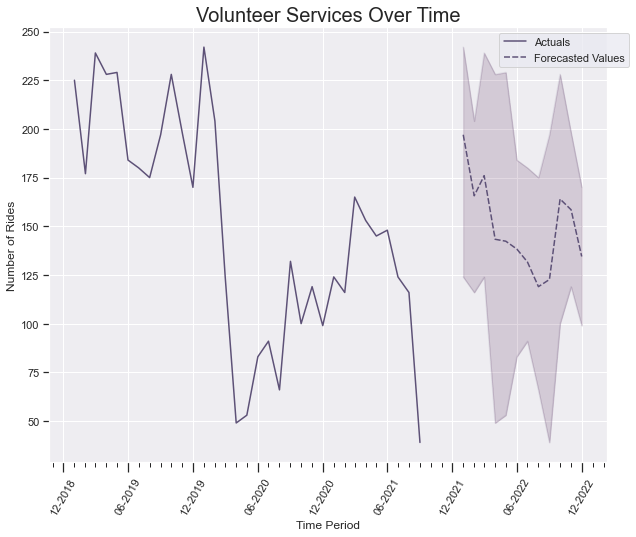

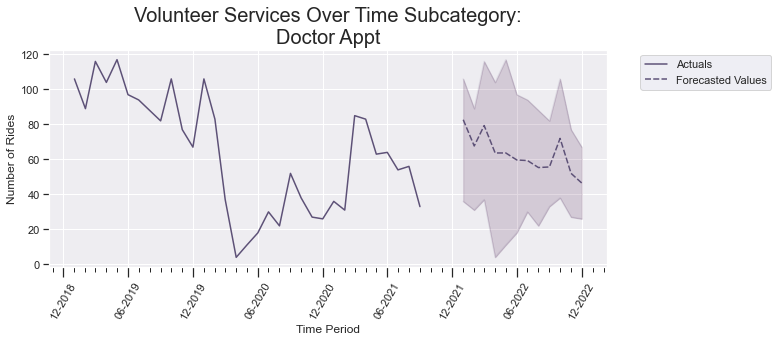

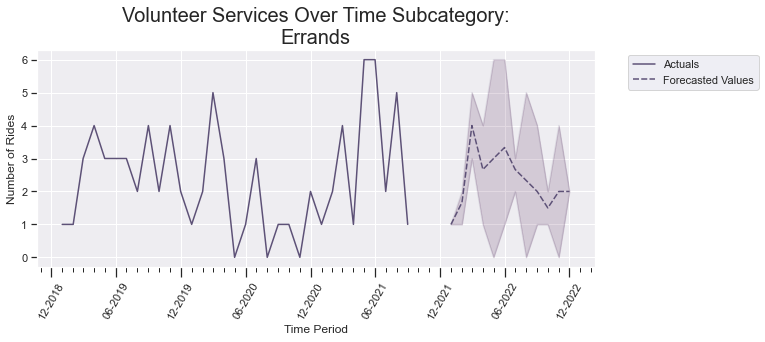

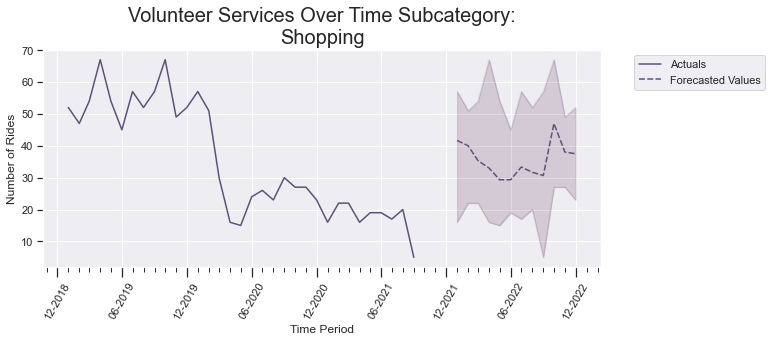

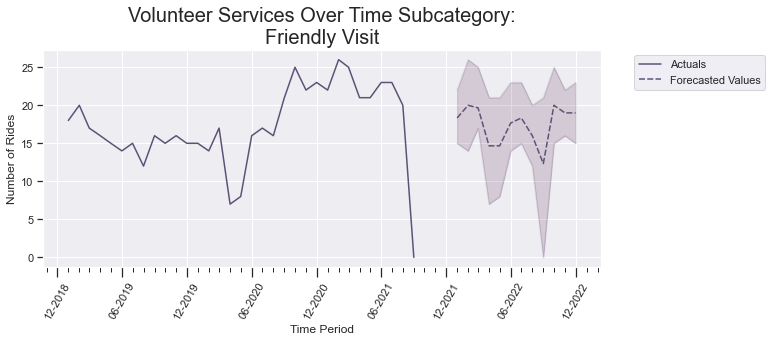

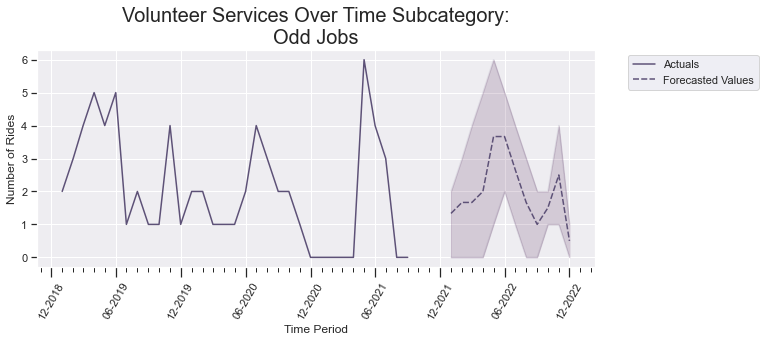

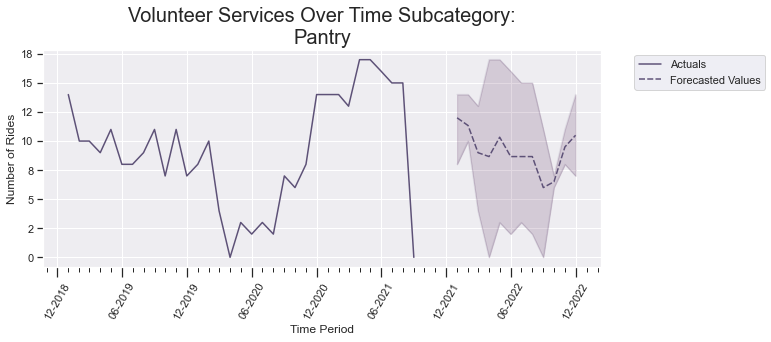

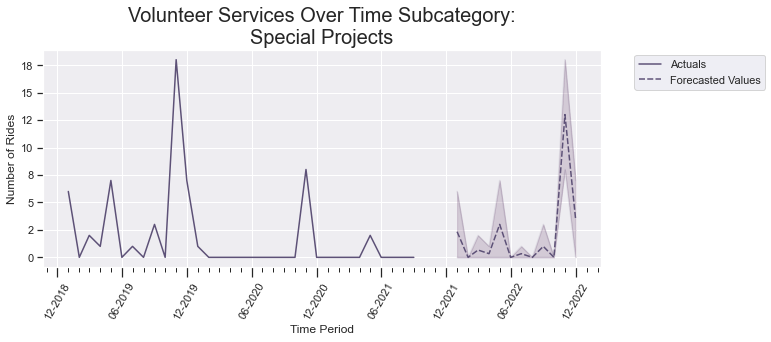

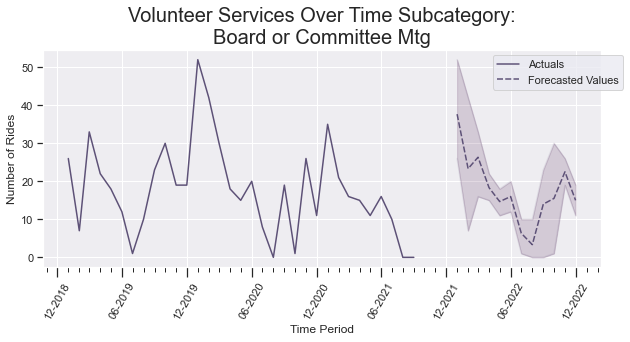

In [9]:
#################
# Data Analysis #
#################

listOfCategories = volunteerServices['category'].unique()
#generateGraphs.generateGraphSet(volunteerServices, 'appt_date', 'category', listOfCategories, 'rider_first_ride_date', 'Amount','No')

generateGraphs.generateGraphSet(dataFrameNameForTitle = 'Volunteer Services', df = volunteerServices, dateColumn='appt_date',specialColumnForCategory ='category', 
                                listOfCategories= listOfCategories, columnForAnalysis='appt_date', 
                                yAxisNameForGraph= 'Number of Rides', isSummed='No')